In [10]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv('town_1959_2.csv', encoding = 'cp1251')
df = df.set_index(u'номер')
df.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


Сильно скошенное распределение, применим log10 тогда


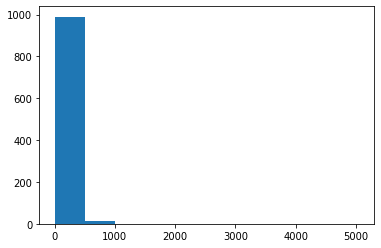

In [54]:
plt.hist(df[u'население'])
print('Сильно скошенное распределение, применим log10 тогда')

Пролагорифмировали по log10


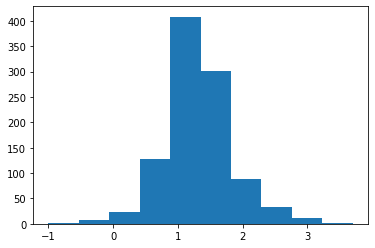

In [55]:
plt.hist(np.log10(df[u'население']))
print('Пролагорифмировали по log10')

In [56]:
res = stats.shapiro(np.log10(df[u'население']))
print('p-value: ', res[1],'\nКритерий ', res[0])

p-value:  3.1486824866172602e-12 
Критерий  0.9746663570404053


p-value получился маленьким(<α = 0.01,0.05). А почему получилось не нормальное распределение? Гистограмма же колоколообразна. Увеличим число столбцов и посмотрим еще раз.

60 столбцов


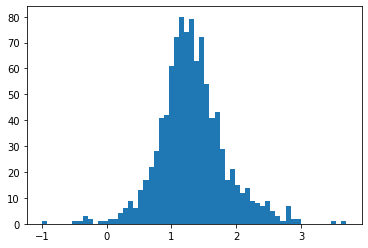

In [57]:
plt.hist(np.log10(df[u'население']), bins=60)
print('60 столбцов')

In [58]:
df.rename(columns={u'население': 'population', u'номер': 'number'}, inplace=True)

In [60]:
df[(df.population < 3000)]

,город,population
номер,,
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0
6,Екатеринбург,779.0
7,Челябинск,689.0
...,...,...
1 000,Усть-Илимск,0.5
1 001,Ясный,0.5
1 002,Мегион,0.4


Видим выбросы по краям, надо от них избавиться

60 столбцов


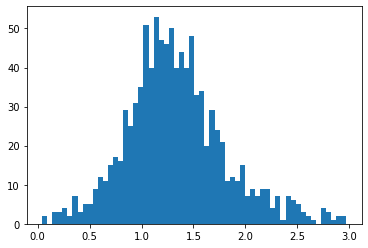

In [68]:
df_no_outburst = df[(df.population < 3000)]
df_no_outburst = df_no_outburst[(df_no_outburst.population > 1)]
plt.hist(np.log10(df_no_outburst['population']), bins=60)
print('60 столбцов')

In [69]:
res = stats.shapiro(np.log10(df_no_outburst['population']))
res[1]

1.0483253154447425e-10

не вышло, тогда можно применить критерий стьюдента или же манна уитни, делая выборки с меньшим количеством элементов